Total anomalies detected: 144


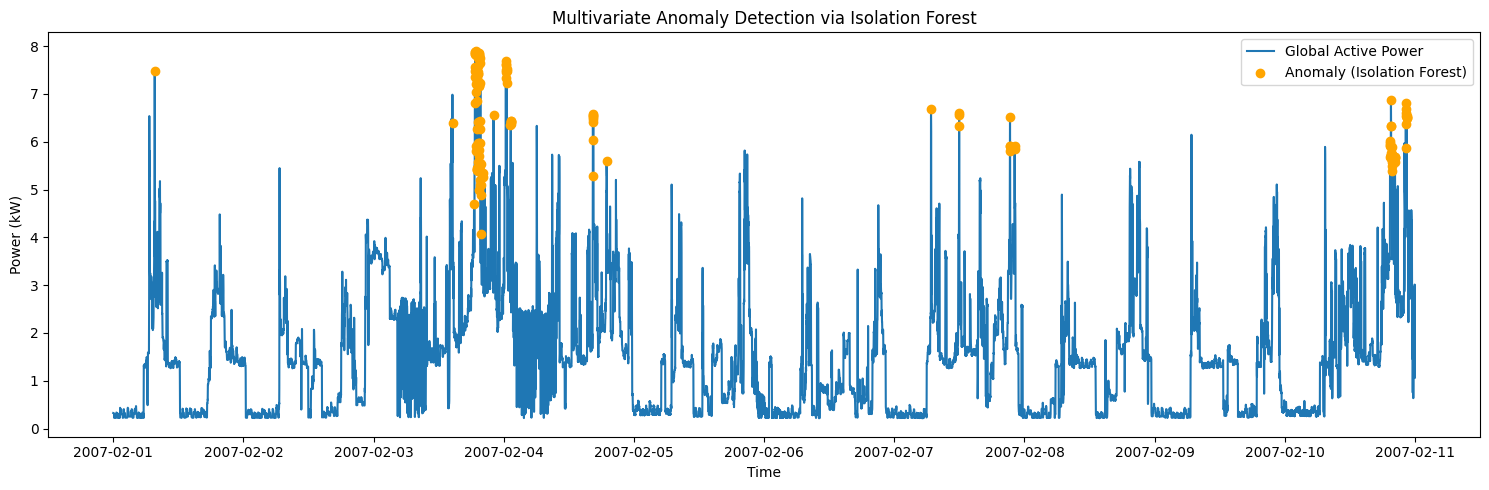

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load sample data
df = pd.read_csv("../data/processed/sample_power_data.csv", parse_dates=["datetime"], index_col="datetime")
df = df.sort_index()

# Use multiple features (you can choose more or fewer)
features = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
data = df[features]

# Normalize the features (important!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Fit Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)  # contamination ~ expected % anomalies
df["anomaly_iforest"] = model.fit_predict(data_scaled)

# Map to 0/1 (1 = normal, -1 = anomaly)
df["anomaly_iforest"] = df["anomaly_iforest"].map({1: 0, -1: 1})

# Count anomalies
print(f"Total anomalies detected: {df['anomaly_iforest'].sum()}")

# Plot anomalies
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["Global_active_power"], label="Global Active Power")
plt.scatter(df[df["anomaly_iforest"] == 1].index,
            df[df["anomaly_iforest"] == 1]["Global_active_power"],
            color="orange", label="Anomaly (Isolation Forest)", zorder=3)
plt.title("Multivariate Anomaly Detection via Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
df.to_csv("../data/processed/iforest_anomaly_output.csv")
print("✅ Saved with anomaly_iforest column.")


✅ Saved with anomaly_iforest column.
